## Data Analysis & Machine Learning Report


# OCD Patient Dataset: Demographics & Clinical Data

## Introduction:

This project will analyze an OCD Patient Dataset: Demographics & Clinical Data, and to build a model for Depression Diagnosis and to extract insights from patient features. 

The dataset is prepared, explored, and used to train classification models mainly (Logistic Regression and Random Forest). 

In this notebook will show a preprocessing, train/test splitting, model training, and the evaluation output.

### Data loading:

In [ ]:
import numpy as np
import pandas as pd
import random

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error

from sklearn.cluster import k_means
import statsmodels.api as sm

In [2]:
data = pd.read_csv('OCD Patient Dataset_ Demographics & Clinical Data.csv', sep = ',')
data

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,Male,Hispanic,Divorced,College Degree,2019-01-10,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI
1496,5013,19,Female,Hispanic,Divorced,Graduate Degree,2022-09-14,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,None,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine
1498,3808,37,Female,Caucasian,Married,Some College,2018-04-14,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine


This data has 1500 rows and 17 columns.

## Data cleaning and preprocessing:

In [3]:
data.shape

(1500, 17)

In [4]:
data.dtypes

Patient ID                        int64
Age                               int64
Gender                           object
Ethnicity                        object
Marital Status                   object
Education Level                  object
OCD Diagnosis Date               object
Duration of Symptoms (months)     int64
Previous Diagnoses               object
Family History of OCD            object
Obsession Type                   object
Compulsion Type                  object
Y-BOCS Score (Obsessions)         int64
Y-BOCS Score (Compulsions)        int64
Depression Diagnosis             object
Anxiety Diagnosis                object
Medications                      object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1500 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [6]:
data.describe()

,Patient ID,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,5541.254000,46.781333,121.745333,20.048000,19.62600
std,2562.389469,16.830321,67.404610,11.823884,11.78287
min,1017.000000,18.000000,6.000000,0.000000,0.00000
25%,3338.000000,32.000000,64.000000,10.000000,9.00000
50%,5539.500000,47.000000,121.000000,20.000000,20.00000
75%,7745.500000,61.000000,178.000000,31.000000,29.00000
max,9995.000000,75.000000,240.000000,40.000000,40.00000


In [7]:
data.describe(include = 'object')

,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Depression Diagnosis,Anxiety Diagnosis,Medications
count,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
unique,2,4,3,4,1218,5,2,5,5,2,2,4
top,Male,Caucasian,Single,Some College,2017-06-21,MDD,Yes,Harm-related,Washing,Yes,Yes,Benzodiazepine
freq,753,398,511,394,4,345,760,333,321,772,751,386


In [8]:
data['Previous Diagnoses'].value_counts()

MDD               345
Panic Disorder    313
GAD               298
PTSD              296
None              248
Name: Previous Diagnoses, dtype: int64

In [9]:
data['Obsession Type'].value_counts()

Harm-related     333
Contamination    306
Religious        303
Symmetry         280
Hoarding         278
Name: Obsession Type, dtype: int64

In [10]:
data.isna().sum()

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
OCD Diagnosis Date               0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64

In [11]:
data.duplicated().sum()

0

The relevant columns dropped for modeling and the model feature matrix X is created by dropping and few columns weill be removed before modeling and the Depression Diagnosis column is used as the target y.

## Exploratory Data Analysis:

This report likely includes visual EDA from the imports for seaborn, matplotlib.

In [12]:
data['Y-BOCS Score'] = data['Y-BOCS Score (Obsessions)'] + data['Y-BOCS Score (Compulsions)']
#data = data.rename(columns = {'Duration of Symptoms (months)': 'Duration of Symptoms'})

In [13]:
cols = ['Patient ID', 'Age', 'Duration of Symptoms (months)', 'Y-BOCS Score']

for ele in cols:
    data[ele] = pd.to_numeric(data[ele], errors = 'coerce').fillna(0)

In [14]:
data['OCD Diagnosis Date'] = pd.to_datetime(data['OCD Diagnosis Date'])

data['Year'] = data['OCD Diagnosis Date'].dt.year

data.drop(['Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)', 'OCD Diagnosis Date'], inplace = True)


In [15]:
duration_year = np.round(data['Duration of Symptoms (months)'] / 12, 1)

symptom = pd.DataFrame({'Patient ID': data['Patient ID'],
                        'Gender': data['Gender'],
                        'Age' : data['Age'],
                        'Symptoms Start Age': data['Age'] - duration_year,
                        'Duration of Symptoms (Years)': duration_year,
                        'Symptoms Started Year': (data['Year'] - np.ceil(data['Duration of Symptoms (months)'] / 12)).astype('int'),
                        'Diagnosis Year': data['Year']})

symptom.head()

,Patient ID,Gender,Age,Symptoms Start Age,Duration of Symptoms (Years),Symptoms Started Year,Diagnosis Year
0,1018,Female,32,15.1,16.9,1999,2016
1,2406,Male,69,54.0,15.0,2002,2017
2,1188,Male,57,42.6,14.4,2003,2018
3,6200,Female,27,16.5,10.5,2003,2014
4,5824,Female,56,42.0,14.0,2008,2022


## Visualization:

Text(0, 0.5, 'Duration (Years)')

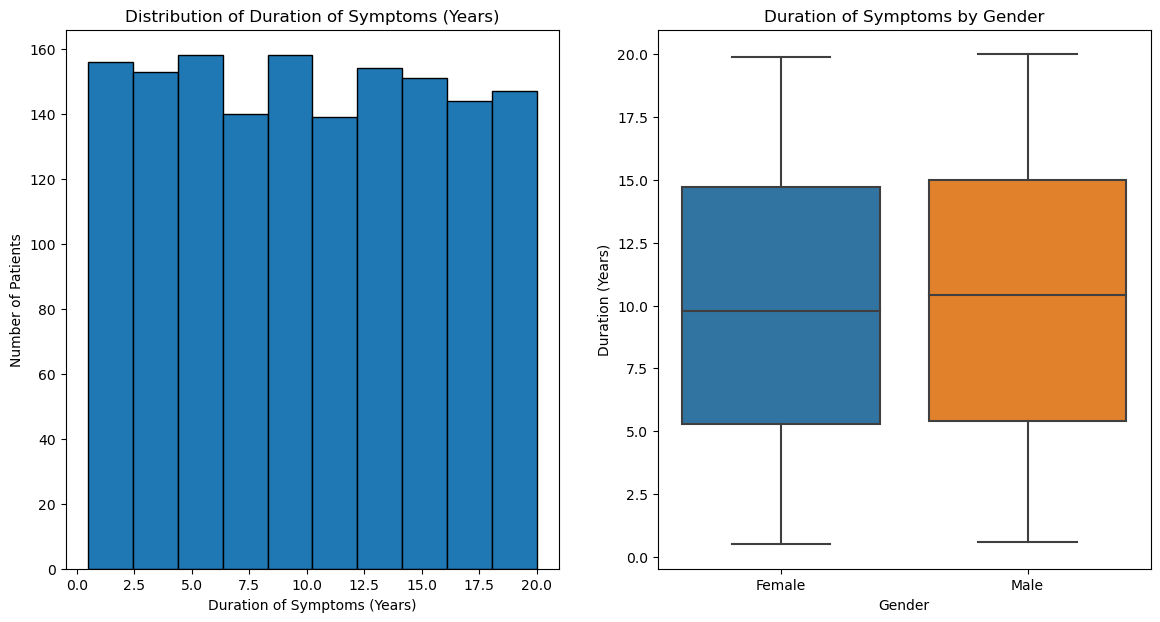

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (14, 7))

axes[0].hist(symptom['Duration of Symptoms (Years)'], bins = 10, edgecolor = 'black')
axes[0].set_title('Distribution of Duration of Symptoms (Years)')
axes[0].set_xlabel('Duration of Symptoms (Years)')
axes[0].set_ylabel('Number of Patients')

sn.boxplot(x = symptom['Gender'], y = symptom['Duration of Symptoms (Years)'])
axes[1].set_title('Duration of Symptoms by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Duration (Years)')


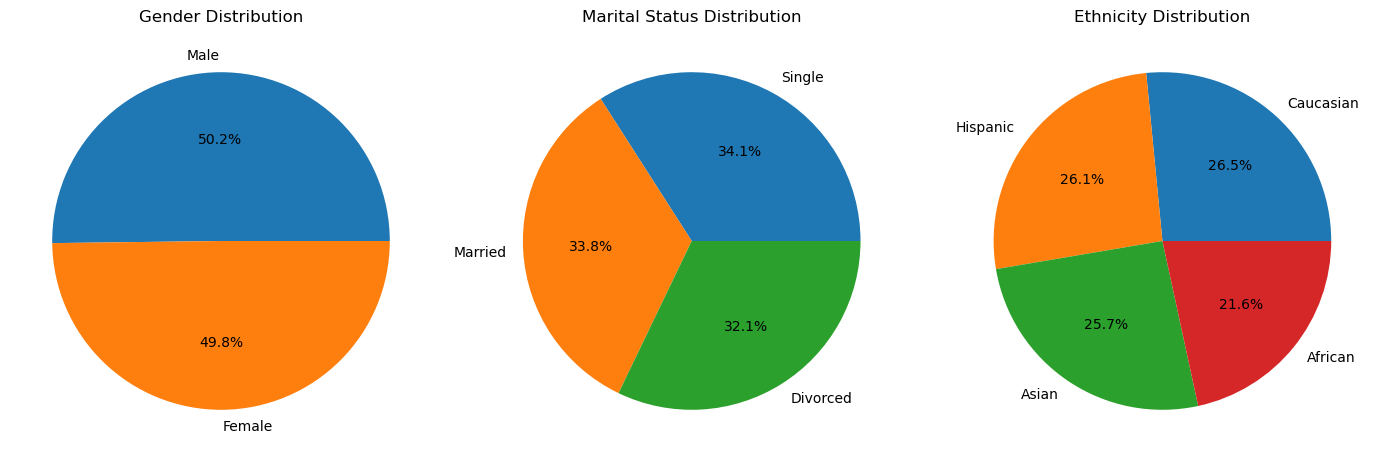

In [17]:
fig, axes = plt.subplots(1, 3, figsize = (14, 7))

gender = data['Gender'].value_counts()
axes[0].pie(gender, autopct = '%1.1f%%', labels = gender.index)
axes[0].set_title('Gender Distribution')


marital_status = data['Marital Status'].value_counts()
axes[1].pie(marital_status, autopct = '%1.1f%%', labels = marital_status.index)
axes[1].set_title('Marital Status Distribution')


ethnicity = data['Ethnicity'].value_counts()
axes[2].pie(ethnicity, autopct = '%1.1f%%', labels = ethnicity.index)
axes[2].set_title('Ethnicity Distribution')

plt.tight_layout()
plt.show()

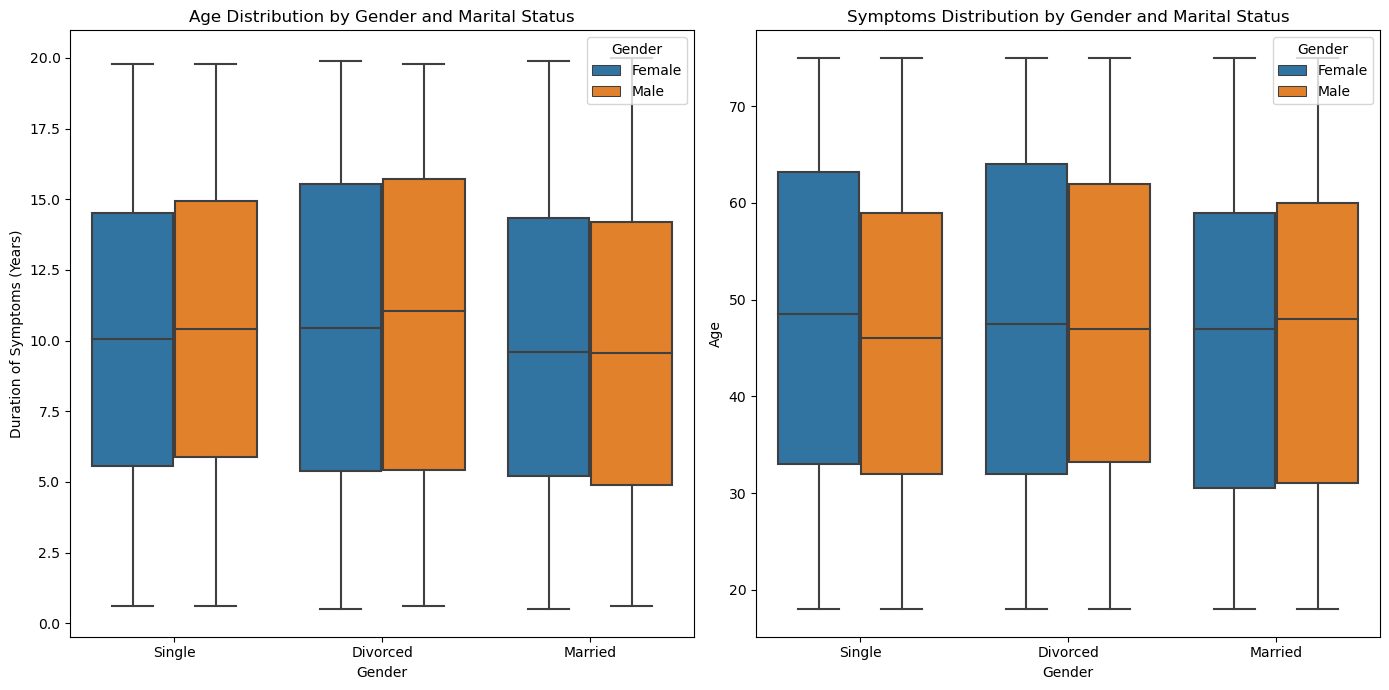

In [18]:
data['Duration of Symptoms (Years)'] = np.round(data['Duration of Symptoms (months)'] / 12, 1)

fig, axes = plt.subplots(1, 2, figsize = (14, 7))

sn.boxplot(x = 'Marital Status', y = 'Duration of Symptoms (Years)', hue = 'Gender', data = data, ax = axes[0])
axes[0].set_title('Age Distribution by Gender and Marital Status')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Duration of Symptoms (Years)')


sn.boxplot(x = 'Marital Status', y = 'Age', hue = 'Gender', data = data, ax = axes[1])
axes[1].set_title('Symptoms Distribution by Gender and Marital Status')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.show()

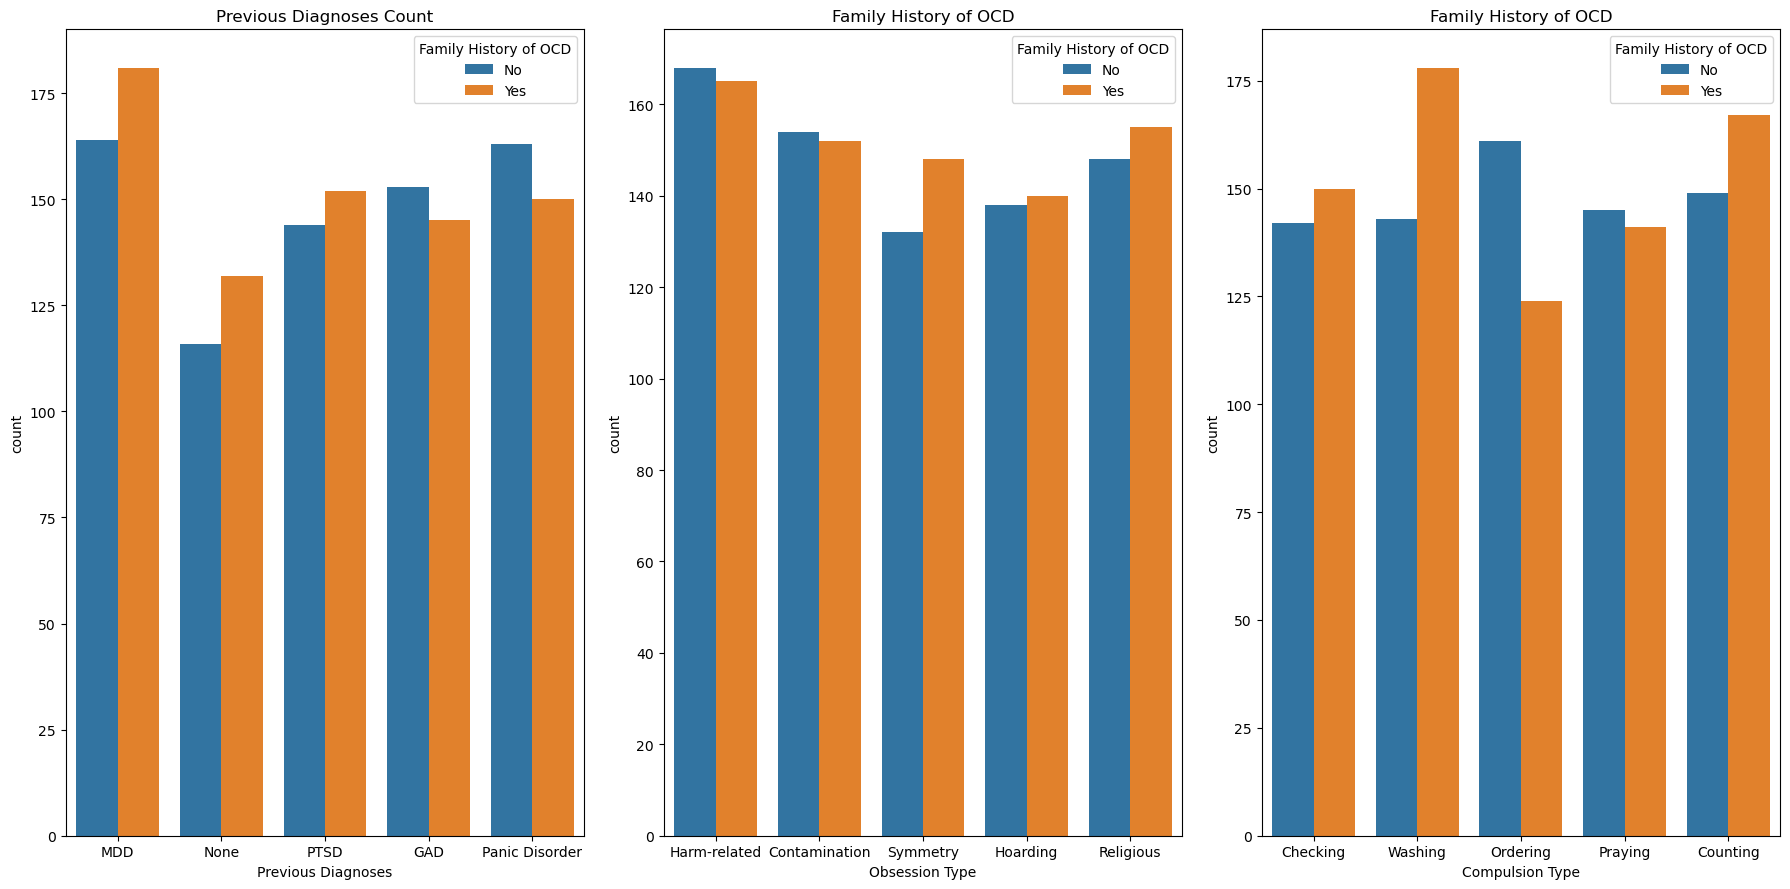

In [19]:
fig, axes = plt.subplots(1, 3, figsize = (18, 9))


sn.countplot(x = 'Previous Diagnoses', hue = 'Family History of OCD', data = data, ax = axes[0])
axes[0].set_title('Previous Diagnoses Count')


sn.countplot(x = 'Obsession Type', hue = 'Family History of OCD', data = data, ax = axes[1])
axes[1].set_title('Family History of OCD')

sn.countplot(x = 'Compulsion Type', hue = 'Family History of OCD', data = data, ax = axes[2])
axes[2].set_title('Family History of OCD')

plt.tight_layout()
plt.show()

In [20]:
data

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Y-BOCS Score,Year,Duration of Symptoms (Years)
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI,27,2016,16.9
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI,46,2017,15.0
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine,7,2018,14.4
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI,42,2014,10.5
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None,57,2022,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,Male,Hispanic,Divorced,College Degree,2019-01-10,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI,54,2019,4.4
1496,5013,19,Female,Hispanic,Divorced,Graduate Degree,2022-09-14,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI,41,2022,13.3
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,None,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine,17,2018,8.3
1498,3808,37,Female,Caucasian,Married,Some College,2018-04-14,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine,23,2018,17.5


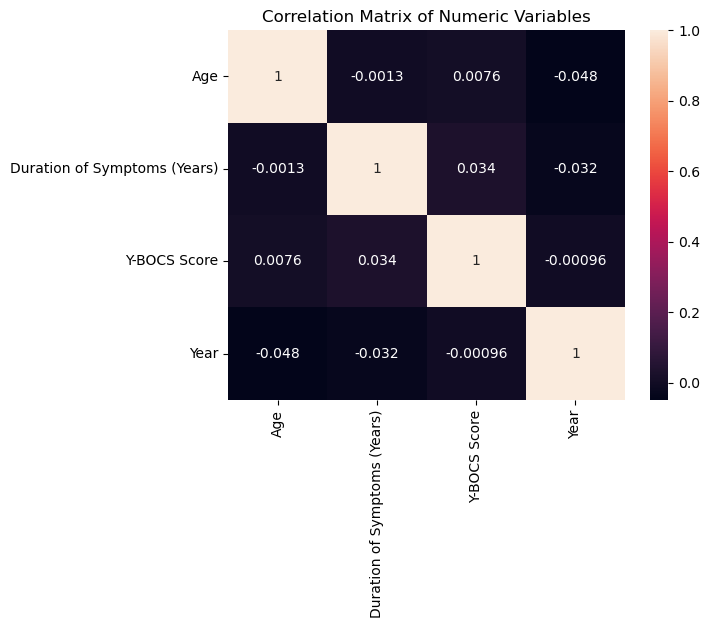

In [21]:
num_cols = ['Age', 'Duration of Symptoms (Years)', 'Y-BOCS Score', 'Year']

sn.heatmap(data[num_cols].corr(), annot = True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

## Statistical Tests:

    t-test

    One-way ANOVA

In [22]:
from scipy.stats import ttest_ind

male = data[data['Gender'] == 'Male']['Duration of Symptoms (Years)']
female = data[data['Gender'] == 'Female']['Duration of Symptoms (Years)']

t_val, p_val = ttest_ind(male, female, nan_policy = 'omit')
print('t-stats:', t_val)
print('p-value:', p_val)

t-stats: 0.4175079331576315
p-value: 0.6763667534746001


Higher p-value = 0.6764, typical significance threshold = 0.05

so, there is no statistically significant difference in the Duration of Symptoms (Years) between Male and Female patients.

In [23]:
from scipy.stats import f_oneway

level = [data[data['Marital Status'] == ele]['Age'] for ele in data['Marital Status'].unique()]
f_val, p_val = f_oneway(* level)
print('F-stats', f_val)
print('p-value:', p_val)

F-stats 0.7645778177019835
p-value: 0.46571212980994203


Higher p-value = 0.4657

So, there is no statistically significant difference in Age across marital status categories.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Patient ID                     1500 non-null   int64         
 1   Age                            1500 non-null   int64         
 2   Gender                         1500 non-null   object        
 3   Ethnicity                      1500 non-null   object        
 4   Marital Status                 1500 non-null   object        
 5   Education Level                1500 non-null   object        
 6   OCD Diagnosis Date             1500 non-null   datetime64[ns]
 7   Duration of Symptoms (months)  1500 non-null   int64         
 8   Previous Diagnoses             1500 non-null   object        
 9   Family History of OCD          1500 non-null   object        
 10  Obsession Type                 1500 non-null   object        
 11  Compulsion Type  

## Machine Learning Regression:

Logistic Regression were used as a model.

Trained on X_train and y_train.

Predictions made on X_test.

Classification report & confusion matrix printed.

Used train_test_split with test_size = 0.2 for evaluation.

In [25]:
num_cols = ['Age', 'Duration of Symptoms (months)', 'Y-BOCS Score']
cat_cols = ['Gender', 'Ethnicity', 'Marital Status', 'Education Level', 'Previous Diagnoses', 'Family History of OCD','Obsession Type', 'Compulsion Type', 'Anxiety Diagnosis', 'Medications']

data[num_cols] = data[num_cols].fillna(0)
data[cat_cols] = data[cat_cols].fillna('Not Applicable')

data['Depression Diagnosis'] = data['Depression Diagnosis'].map({'Yes': 1, 'No': 0})

In [26]:
df = data.copy()
s = StandardScaler()
df[num_cols] = s.fit_transform(df[num_cols])

new_df = pd.get_dummies(df, columns = cat_cols, drop_first = True)

In [27]:
X = new_df.drop(['Depression Diagnosis', 'Patient ID', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)', 'Year', 'OCD Diagnosis Date'], axis = 1)
y = new_df['Depression Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
X

,Age,Duration of Symptoms (months),Y-BOCS Score,Duration of Symptoms (Years),Gender_Male,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Marital Status_Married,Marital Status_Single,...,Obsession Type_Religious,Obsession Type_Symmetry,Compulsion Type_Counting,Compulsion Type_Ordering,Compulsion Type_Praying,Compulsion Type_Washing,Anxiety Diagnosis_Yes,Medications_None,Medications_SNRI,Medications_SSRI
0,-0.878549,1.205878,-0.748144,16.9,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,1.320597,0.864542,0.373423,15.0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,0.607361,0.760657,-1.928740,14.4,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.175731,0.063142,0.137303,10.5,0,0,0,1,1,0,...,0,1,0,0,0,1,1,0,0,1
4,0.547924,0.686453,1.022750,14.0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-0.521931,-1.020231,0.845661,4.4,1,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
1496,-1.651222,0.567727,0.078274,13.3,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
1497,-0.403058,-0.322717,-1.338442,8.3,1,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1498,-0.581367,1.309764,-0.984263,17.5,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
log = LogisticRegression()
log.fit(X_train, y_train)

pred = log.predict(X_test)

print('Classification Report:', classification_report(y_test, pred))
print('Confusion Matrix:', confusion_matrix(y_test, pred))

Classification Report:               precision    recall  f1-score   support

           0       0.54      0.47      0.50       142
           1       0.57      0.63      0.60       158

    accuracy                           0.56       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.55      0.56      0.55       300

Confusion Matrix: [[ 67  75]
 [ 58 100]]


Classification report and confusion matrix for a binary classification with labels 0 and 1.

Accuracy = 56%, for a balanced binary classification which indicates the features provide limited predictive power.

Class 1 has better recall 0.63 than class 0, so the model finds positives better than negatives.

The confusion matrix shows many false negatives or false positives.

In [30]:
feature_Values = pd.DataFrame({'Columns': X.columns, 'Coefficient': log.coef_[0]})

feature_Values.head(10)

,Columns,Coefficient
0,Age,-0.038711
1,Duration of Symptoms (months),0.054646
2,Y-BOCS Score,-0.007812
3,Duration of Symptoms (Years),-0.001337
4,Gender_Male,-0.029811
5,Ethnicity_Asian,0.105481
6,Ethnicity_Caucasian,-0.111763
7,Ethnicity_Hispanic,-0.180302
8,Marital Status_Married,-0.067138
9,Marital Status_Single,-0.151291


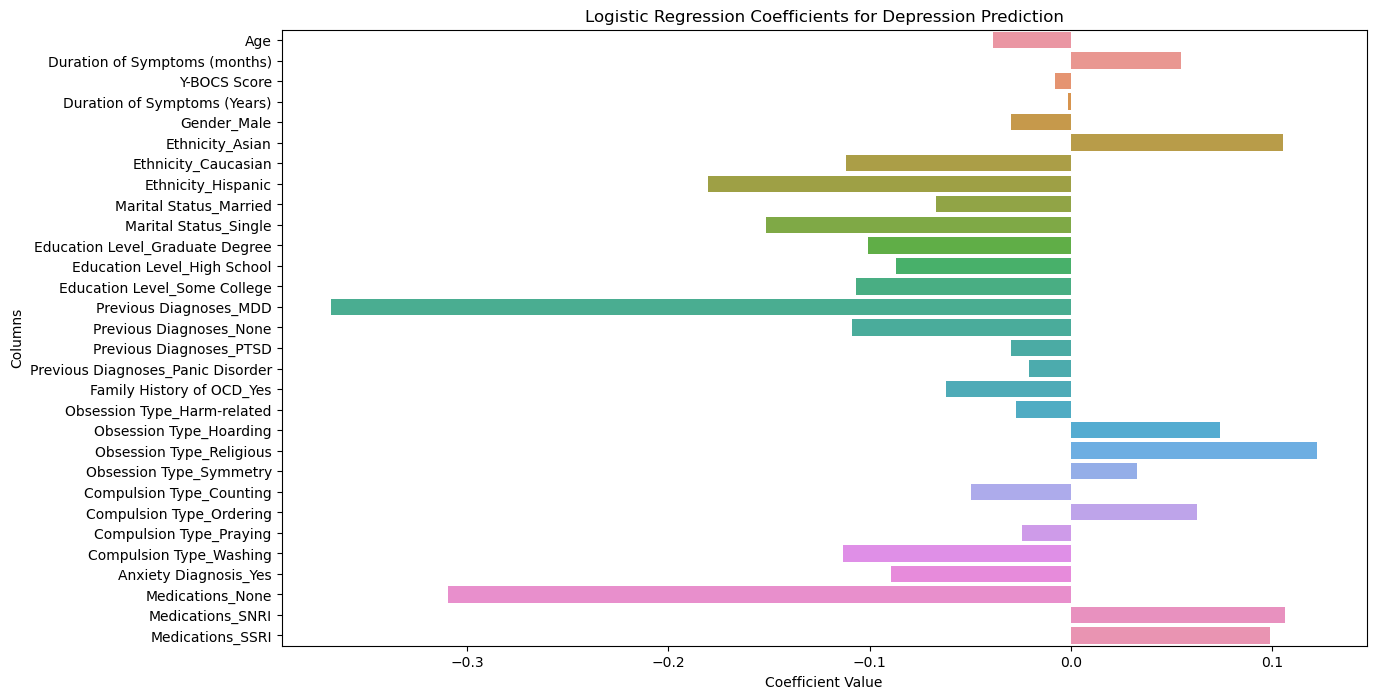

In [31]:
plt.figure(figsize = (14, 8))

sn.barplot(x = 'Coefficient', y = 'Columns', data = feature_Values)
plt.title('Logistic Regression Coefficients for Depression Prediction')
plt.xlabel('Coefficient Value')
plt.ylabel('Columns')
plt.show()

Older individuals are slightly less to be diagnosed with depression, and other variables were constant so the effect is small but negative.

Patients with long term OCD symptoms may be at higher risk for co occurring depression.

The month based duration depression risks more strongly than the year based duration.

Male slightly reduces the likelihood of a depression diagnosis.

Asian ethnicity is more with a higher likelihood of depression diagnosis and the Hispanic ethnicity is the strongest negative predictor in the model.

Marriage is associated with lower depression probability.

## Summary:

EDA and the graphs showed there is no major differences in age or symptom duration across gender or marital status groups.

Statistical tests called t-test & ANOVA confirmed no significant group differences, matching visual results.

ML model Logistic Regression achieved moderate accuracy 56%, indicating limited predictive power.

Overall, clinical features predict depression better than demographics, and more detailed symptom data is needed to improve model performance.